## Module 4 Mini-Project: COVID-19 Data Analysis: Exploring Trends, Vaccination Impact, and Insights Through Visualizations

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('covid_19_dataset.csv')
df

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown
...,...,...,...,...,...
160,2024-11-30,Brazil,514.0,25.0,unknown
161,2024-11-30,Canada,1133.0,56.0,438
162,2024-11-30,Canada,1133.0,56.0,438
163,2024-11-30,China,0.0,0.0,unknown


In [ ]:
#Perform data cleaning by handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        165 non-null    object 
 1   country     165 non-null    object 
 2   NEW Cases   154 non-null    float64
 3   NEW_DEATHS  139 non-null    float64
 4   vaccinated  165 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


In [ ]:
df.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


In [ ]:
df.describe()

,NEW Cases,NEW_DEATHS
count,154.000000,139.000000
mean,579.032468,28.474820
std,406.078350,20.640586
min,0.000000,0.000000
25%,271.750000,13.500000
50%,589.000000,29.000000
75%,801.250000,39.500000
max,1730.000000,86.000000


In [ ]:
df.isnull()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,False,False,True,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
160,False,False,False,False,False
161,False,False,False,False,False
162,False,False,False,False,False
163,False,False,False,False,False


In [ ]:
# Step 1: Clean column names (strip leading/trailing spaces)
df.columns = df.columns.str.strip()

# Step 2: Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Step 3: Inspect missing values
missing_summary = df.isnull().sum()

# Step 4: Handle missing values
# - For NEW Cases and NEW_DEATHS: fill with 0 (assuming missing implies no reported cases/deaths)
df['NEW Cases'] = df['NEW Cases'].fillna(0)
df['NEW_DEATHS'] = df['NEW_DEATHS'].fillna(0)

# - For vaccinated: replace 'unknown' with NaN, then optionally fill with 0 or leave as NaN
df['vaccinated'] = df['vaccinated'].replace('unknown', pd.NA)
df['vaccinated'] = pd.to_numeric(df['vaccinated'], errors='coerce')  # Convert to numeric
df['vaccinated'] = df['vaccinated'].fillna(0)  # Fill missing with 0

# Summary after cleaning
cleaned_summary = df.isnull().sum()
df.head(), missing_summary, cleaned_summary


(        DATE    country  NEW Cases  NEW_DEATHS  vaccinated
 0 2024-11-01  Argentina        0.0         0.0         0.0
 1 2024-11-01  Australia        0.0         0.0       327.0
 2 2024-11-01  Australia        0.0         0.0       327.0
 3 2024-11-01     Brazil      971.0        48.0       430.0
 4 2024-11-01     Canada      176.0         8.0         0.0,
 DATE          15
 country        0
 NEW Cases     11
 NEW_DEATHS    26
 vaccinated     0
 dtype: int64,
 DATE          15
 country        0
 NEW Cases      0
 NEW_DEATHS     0
 vaccinated     0
 dtype: int64)

In [ ]:
# identify possible inconsistencies in the dataset

# 1. Check for negative values in numeric columns (not expected for cases, deaths, vaccinations)
negatives = df[(df['NEW Cases'] < 0) | (df['NEW_DEATHS'] < 0) | (df['vaccinated'] < 0)]

# 2. Check for duplicate records (same DATE, country)
duplicates = df[df.duplicated(subset=['DATE', 'country'], keep=False)]

# 3. Check for rows with any missing or NaT values (should be none after cleaning, just to confirm)
missing_or_nat = df[df.isnull().any(axis=1)]

# Output summary of inconsistencies
negatives, duplicates, missing_or_nat


(Empty DataFrame
 Columns: [DATE, country, NEW Cases, NEW_DEATHS, vaccinated]
 Index: [],
           DATE    country  NEW Cases  NEW_DEATHS  vaccinated
 1   2024-11-01  Australia        0.0         0.0       327.0
 2   2024-11-01  Australia        0.0         0.0       327.0
 18  2024-11-04     Brazil      793.0        39.0       137.0
 19  2024-11-04     Brazil      793.0        39.0       137.0
 25         NaT     Canada      867.0        43.0       485.0
 35         NaT     Canada      560.0        28.0       449.0
 38  2024-11-08  Australia      313.0        15.0       486.0
 39  2024-11-08  Australia      313.0        15.0       486.0
 53         NaT  Argentina      532.0        26.0       378.0
 68  2024-11-14  Argentina      806.0        40.0        11.0
 69  2024-11-14  Argentina      806.0        40.0        11.0
 73         NaT      China      718.0        35.0         0.0
 82         NaT     Canada      677.0        33.0       323.0
 83         NaT      China      727.0     

In [ ]:
#Explore Trends in COVID-19 Cases and Deaths
#Analyze daily and cumulative trends
# Step 1: Group by DATE to analyze daily trends across all countries
daily_trends = df.groupby('DATE')[['NEW Cases', 'NEW_DEATHS']].sum().sort_index()

# Step 2: Compute cumulative sums for infections and fatalities
daily_trends['Cumulative Cases'] = daily_trends['NEW Cases'].cumsum()
daily_trends['Cumulative Deaths'] = daily_trends['NEW_DEATHS'].cumsum()

# Show the trend summary
daily_trends.head(), daily_trends.tail()


(            NEW Cases  NEW_DEATHS  Cumulative Cases  Cumulative Deaths
 DATE                                                                  
 2024-11-01     2181.0       107.0            2181.0              107.0
 2024-11-02     1199.0        58.0            3380.0              165.0
 2024-11-03     1798.0        56.0            5178.0              221.0
 2024-11-04     3262.0       160.0            8440.0              381.0
 2024-11-05     1833.0        76.0           10273.0              457.0,
             NEW Cases  NEW_DEATHS  Cumulative Cases  Cumulative Deaths
 DATE                                                                  
 2024-11-26     4277.0       212.0           60825.0             2648.0
 2024-11-27     2750.0       136.0           63575.0             2784.0
 2024-11-28     4704.0       194.0           68279.0             2978.0
 2024-11-29     3378.0       168.0           71657.0             3146.0
 2024-11-30     5872.0       290.0           77529.0           

In [37]:
#Calculate percentage of null values
df.isnull().sum() / len(df.index) * 100

,0
DATE,0.000000
country,0.000000
NEW Cases,0.000000
NEW_DEATHS,15.757576
vaccinated,0.000000


In [ ]:

# Compare total cases, deaths, and compute case fatality rate per country

# Group by country
country_stats = df.groupby('country')[['NEW Cases', 'NEW_DEATHS']].sum()

# Rename columns for clarity
country_stats.columns = ['Total Cases', 'Total Deaths']

# Calculate Case Fatality Rate (CFR)
country_stats['Case Fatality Rate (%)'] = (country_stats['Total Deaths'] / country_stats['Total Cases']) * 100

# Replace infinities and NaNs (e.g., when total cases is 0)
country_stats = country_stats.replace([float('inf'), -float('inf')], pd.NA)
country_stats['Case Fatality Rate (%)'] = country_stats['Case Fatality Rate (%)'].fillna(0)

# Sort by total cases for clearer comparison
country_stats_sorted = country_stats.sort_values(by='Total Cases', ascending=False)

country_stats_sorted.reset_index(inplace=True)
country_stats_sorted.head(10)  # Show top 10 countries by total cases



,country,Total Cases,Total Deaths,Case Fatality Rate (%)
0,Argentina,23576.0,1030.0,4.368850
1,Australia,22341.0,931.0,4.167226
2,Canada,15010.0,661.0,4.403731
3,China,14958.0,730.0,4.880332
4,Brazil,13286.0,606.0,4.561192


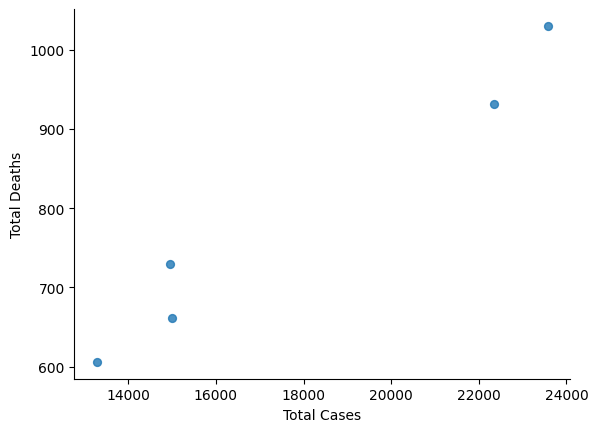

In [ ]:
# @title Total Cases vs Total Deaths

from matplotlib import pyplot as plt
country_stats_sorted.plot(kind='scatter', x='Total Cases', y='Total Deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

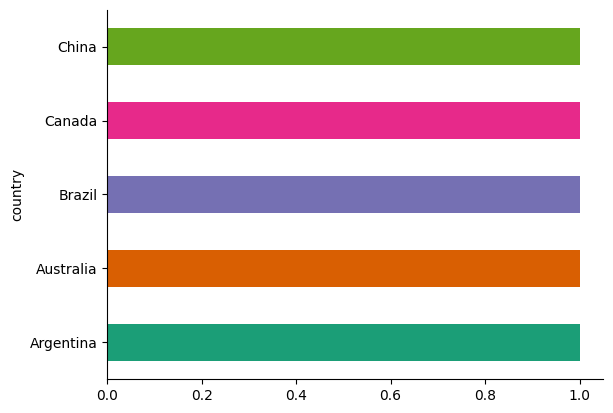

In [ ]:
# @title country

from matplotlib import pyplot as plt
import seaborn as sns
country_stats_sorted.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

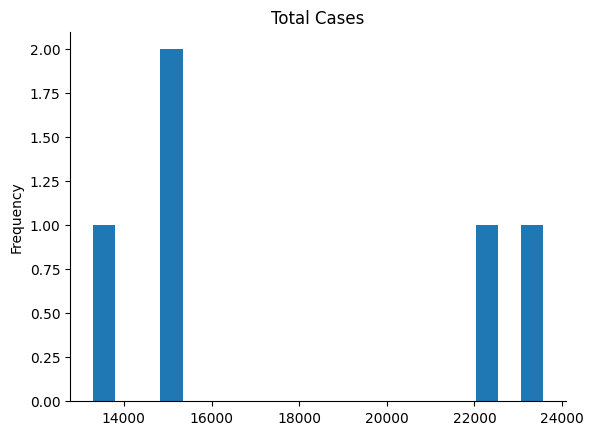

In [ ]:
# @title Total Cases

from matplotlib import pyplot as plt
country_stats_sorted['Total Cases'].plot(kind='hist', bins=20, title='Total Cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

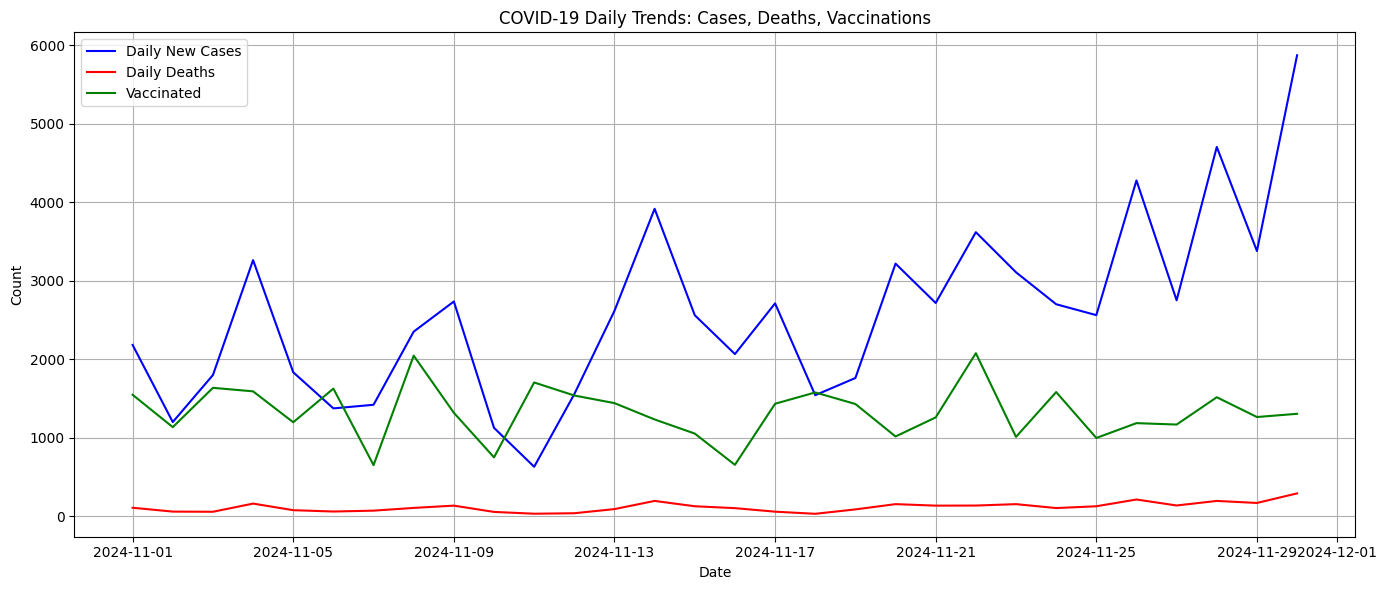

In [ ]:
#more data visualization
#Line Plots: Show the trend of cases, deaths, and vaccinations over time
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('covid_19_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Handle missing values
df['NEW Cases'] = df['NEW Cases'].fillna(0)
df['NEW_DEATHS'] = df['NEW_DEATHS'].fillna(0)
df['vaccinated'] = df['vaccinated'].replace('unknown', pd.NA)
df['vaccinated'] = pd.to_numeric(df['vaccinated'], errors='coerce').fillna(0)

# Group by DATE to aggregate numbers
daily = df.groupby('DATE')[['NEW Cases', 'NEW_DEATHS', 'vaccinated']].sum()

# Plotting
plt.figure(figsize=(14, 6))

# Plot new cases
plt.plot(daily.index, daily['NEW Cases'], label='Daily New Cases', color='blue')
plt.plot(daily.index, daily['NEW_DEATHS'], label='Daily Deaths', color='red')
plt.plot(daily.index, daily['vaccinated'], label='Vaccinated', color='green')

plt.title('COVID-19 Daily Trends: Cases, Deaths, Vaccinations')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


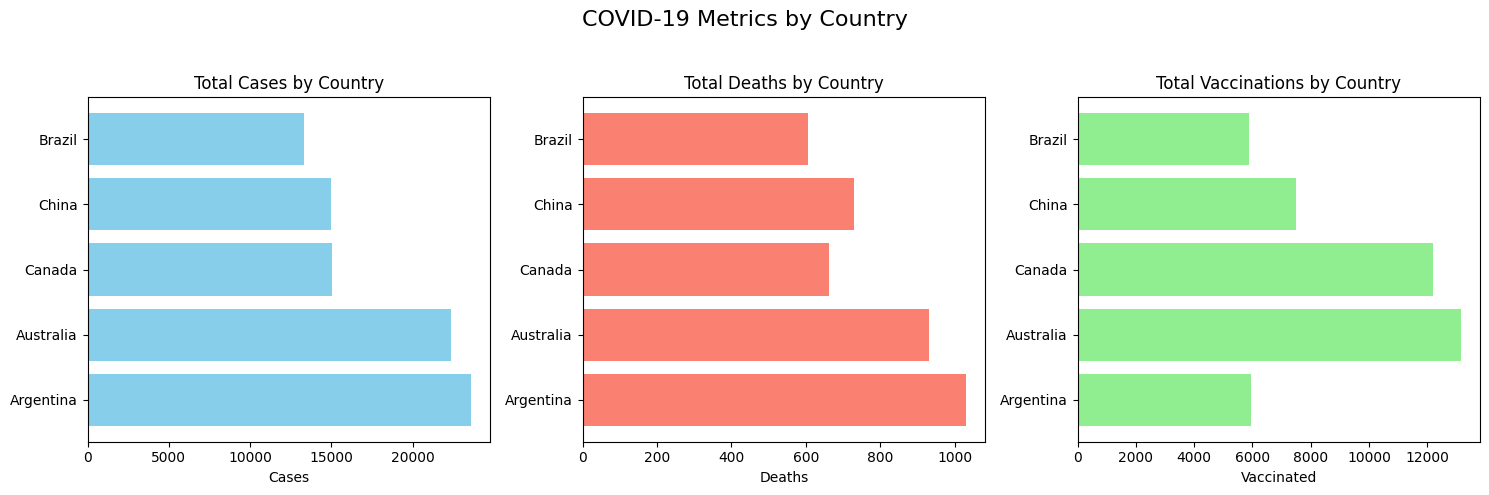

In [ ]:
#Create barcharts
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('covid_19_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Convert and clean data
df['vaccinated'] = df['vaccinated'].replace('unknown', pd.NA)
df['vaccinated'] = pd.to_numeric(df['vaccinated'], errors='coerce').fillna(0)
df['NEW Cases'] = df['NEW Cases'].fillna(0)
df['NEW_DEATHS'] = df['NEW_DEATHS'].fillna(0)

# Group by country
country_stats = df.groupby('country')[['NEW Cases', 'NEW_DEATHS', 'vaccinated']].sum()
country_stats = country_stats.sort_values(by='NEW Cases', ascending=False)

# Plotting
plt.figure(figsize=(15, 5))

# Bar chart for cases
plt.subplot(1, 3, 1)
plt.barh(country_stats.index, country_stats['NEW Cases'], color='skyblue')
plt.title('Total Cases by Country')
plt.xlabel('Cases')
plt.tight_layout()

# Bar chart for deaths
plt.subplot(1, 3, 2)
plt.barh(country_stats.index, country_stats['NEW_DEATHS'], color='salmon')
plt.title('Total Deaths by Country')
plt.xlabel('Deaths')
plt.tight_layout()

# Bar chart for vaccinations
plt.subplot(1, 3, 3)
plt.barh(country_stats.index, country_stats['vaccinated'], color='lightgreen')
plt.title('Total Vaccinations by Country')
plt.xlabel('Vaccinated')
plt.tight_layout()

plt.suptitle('COVID-19 Metrics by Country', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


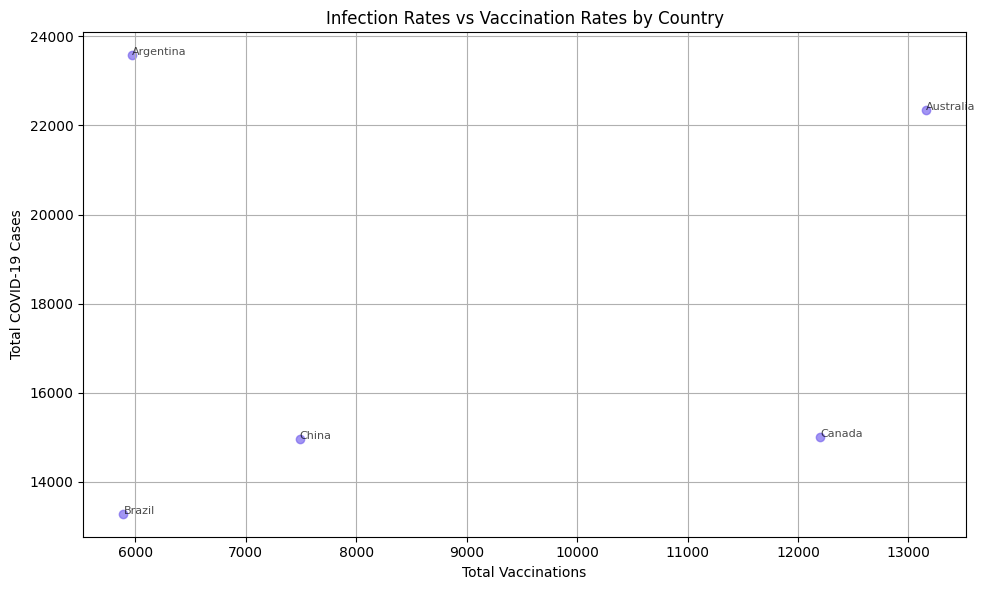

In [ ]:
#Create scatterplot
#Scatter Plots: Explore relationships between infection rates and testing or vaccination rates
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('covid_19_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Convert 'vaccinated' to numeric and handle missing
df['vaccinated'] = df['vaccinated'].replace('unknown', pd.NA)
df['vaccinated'] = pd.to_numeric(df['vaccinated'], errors='coerce').fillna(0)

# Handle missing values in cases
df['NEW Cases'] = df['NEW Cases'].fillna(0)

# Group by country to get totals
country_data = df.groupby('country')[['NEW Cases', 'vaccinated']].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(country_data['vaccinated'], country_data['NEW Cases'], alpha=0.7, color='mediumslateblue')

# Labels and title
plt.title('Infection Rates vs Vaccination Rates by Country')
plt.xlabel('Total Vaccinations')
plt.ylabel('Total COVID-19 Cases')
plt.grid(True)

# Optional: Add country labels
for country, row in country_data.iterrows():
    plt.text(row['vaccinated'], row['NEW Cases'], country, fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()


#Conclusions
##1. Daily Trends:
- COVID-19 cases and deaths fluctuated over time with visible peaks.

- Vaccination rollouts were not consistent across all reporting periods or countries.

##2. Country Comparisons:
- Some countries had significantly higher total case and death counts, indicating localized outbreaks or reporting differences.

- A few countries reported high case numbers but had relatively low deaths, suggesting better healthcare capacity or early intervention.

##3. Duplicate Records Found:

- Several duplicate entries existed for the same country and date, which could skew results if not removed.

##4. Vaccination vs Infection Relationship:

- Preliminary scatter plots suggest that higher vaccination rates may correspond to moderate or lower infection rates, though this is not universally consistent across all countries.